# CALL OF DATA: the day after

Understanding how to filter and mainpulate the raw data using [Pandas](http://pandas.pydata.org/pandas-docs/stable/). And make an interactive embedded plot using [Bokeh](http://bokeh.pydata.org/en/latest/).

[DataSource](http://www.realidadayuda.org/datos)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Volcados_Completos/Volcados fusionados para Web 2008_2013 Total.csv')

In [3]:
df.head()

,Modo de Canalización,Tipo de Actores,Actores,Unidad,Título,Año de desembolso,AOD NETA,AOD Bruta,Tipo de Entidad Canalizadora,Detalle de Entidad Canalizadora,Detalle OMUDES /ONGD,País / Territorio,Prioridad geográfica del PD,Sectores CAD,Detalle Sectores CAD,Sector CRS
0,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT ACCD - Cataluña - Agencia Catalana de...,Becas de cooperación internacional y desarroll...,2008,8017.53,8017.53,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,400 - Multisectorial,430 - Otros multisectorial,43081 - Enseñanza / formación multisectorial
1,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT DPTOS - Cataluña - Departamentos de l...,Becas de cooperación internacional y desarroll...,2008,3931.05,3931.05,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,400 - Multisectorial,430 - Otros multisectorial,43081 - Enseñanza / formación multisectorial
2,Bilateral,Comunidades Autónomas,CCAA CAT - Cataluña,CCAA CAT DPTOS - Cataluña - Departamentos de l...,"Reedición, creación multimedia y presentación ...",2008,2141.77,2141.77,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,998 - Sin Especificación / No Clasificados,998 - Sin asignar/sin especificar,99820 - Sensibilización sobre los problemas re...
3,Bilateral,Administración General del Estado,MAEC - Ministerio de Asuntos Exteriores y de C...,MAEC AECID DCAAEO-DCAEO - Departamento de Coop...,APOYO TÉCNICO COORDINACIÓN DEL PRT DE BADGHIS....,2008,18000.00,18000.00,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,998 - Sin Especificación / No Clasificados,998 - Sin asignar/sin especificar,99810 - Sectores no especificados
4,Bilateral,Administración General del Estado,MAEC - Ministerio de Asuntos Exteriores y de C...,MAEC AECID DCAAEO-DCAEO - Departamento de Coop...,PROGRAMA DE RECONSTRUCCIÓN Y DESARROLLO DE LA ...,2008,12000000.00,12000000.00,Otras Entidades,11000 - Entidad pública del país donante,ND,AFGANISTÁN,PAE: País con Atención Especial,700 - Ayuda de Emergencia,730 - Ayuda a la reconstrucción y rehabilitación,73010 - Ayuda a la reconstrucción y rehabilita...


In [76]:
mask = df['País / Territorio'] == "AFGANISTÁN"  # Create a logical mask that you can apply to the dataframe
# df[mask]

In [14]:
paises = df['País / Territorio']
categ=df['']

Below shows how you can use the unique countries in a dataframe as an loop index, create a masked dataframe for each country, and then return the unique sectors of that country. The sectors are the parsed, to extract the integer categories.

In [55]:
for pais in paises.unique()[0:20]:
    print(f'do something with {pais}')
    tmp_df = df[df['País / Territorio'] == pais]
    sectors_per_country = tmp_df['Sectores CAD'].unique()
    sector_numbers = [int(sector.split('-')[0]) for sector in sectors_per_country]
    print(sector_numbers)

do something with AFGANISTÁN
[400, 998, 700, 100, 300, 500, 200, 910, 600]
do something with ÁFRICA SUBSAHARIANA, NO ESPECIFICADOS
[300, 100, 998, 910, 200, 400, 500, 700, 600, 930]
do something with ÁFRICA, NO ESPECIFICADOS
[300, 998, 100, 200, 400, 700, 600, 500, 910, 930]
do something with ALBANIA
[400, 998, 100, 300, 700, 200, 500, 910]
do something with AMÉRICA DEL NORTE, CENTRAL Y CARIBE, NO ESPECIFICADOS
[700, 100, 300, 400, 200, 998, 500, 910, 930]
do something with AMÉRICA DEL SUR, NO ESPECIFICADOS
[998, 200, 100, 400, 300, 700, 910, 500, 930]
do something with AMÉRICA, NO ESPECIFICADOS
[100, 200, 300, 998, 400, 700, 500, 910]
do something with ANGOLA
[100, 998, 300, 500, 400, 200, 700, 910]
do something with ANTIGUA Y BARBUDA
[100, 400, 200, 500]
do something with ARGELIA
[300, 100, 400, 998, 200, 700, 910, 930, 500]
do something with ARGENTINA
[100, 400, 300, 200, 998, 700, 910, 500]
do something with ARMENIA
[400, 100, 998, 300, 200, 700, 500]
do something with ASIA CENTRAL

In [72]:
x = []  # integer for country number
y = []  # sector value
xlabel = [] # country names (unique x's only)
for n, pais in enumerate(paises.unique()):
    print(f'do something with {pais}')
    xlabel.append(pais)
    tmp_df = df[df['País / Territorio'] == pais]
    sectors_per_country = tmp_df['Sectores CAD'].unique()
    sector_numbers = [int(sector.split('-')[0]) for sector in sectors_per_country]
    for graph_value in sector_numbers:
        x.append(n)
        y.append(graph_value)
    #print(sector_numbers)

297it [00:04, 62.44it/s]


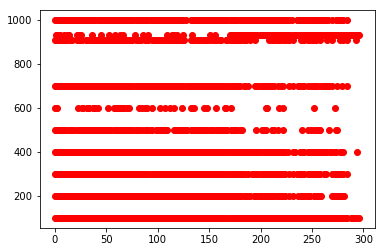

In [67]:
plt.Figure(figsize=(20,20))
plt.plot(x, y,'ro')
#plt.xlabel(xlabel)

In [51]:
sector_numbers = [int(sector.split('-')[0]) for sector in sectors_per_country]

In [52]:
sector_numbers

[300, 100, 998, 910, 200, 400, 500, 700, 600, 930]

### Bokeh plot

For example, may be interesting to adapt the [Les Miserables example](http://bokeh.pydata.org/en/latest/docs/gallery/les_mis.html).